In [1]:
!pip install pydotplus

In [2]:
!pip install graphviz

In [3]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [4]:
data = pd.read_csv("winequality_red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
X = data.drop(columns='quality')
y = data['quality']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=355)

In [8]:
# Let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
class_name

[7, 5, 3, 6, 4, 8]

In [10]:
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

1 ) 
https://datascience.stackexchange.com/questions/37428/graphviz-not-working-when-imported-inside-pydotplus-graphvizs-executables-not

Download and install graphviz-2.38.msi (use the newest version) from https://graphviz.gitlab.io/_pages/Download/Download_windows.html

Set the path variable

        (a) Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit

        (b) add 'C:\Program Files (x86)\Graphviz2.38\bin'

2 ) 
#https://stackoverflow.com/questions/27666846/pydot-invocationexception-graphvizs-executables-not-found

On Windows 8 this solved the same problem for me:

In [11]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [12]:
# create  a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names=feature_name,rounded = True , filled = True)
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('myTree.png')
#Show graph
Image(graph.create_png())


Let's understand the above tree:


the first value indicates the column and the condition on which the root node was selected and further will be splitted
the second value gives the gini impurity of the selected node
samples gives the number of observations at that point of time present in the node
value within the square brackets represents number of observations present in each class(output) i.e. in the above given figure, 8 observations are in class 1, 38 in class 2 , 468 in class 3 and so on.
Then the split was made on the basis of given condition.

In [14]:
clf.score(x_train,y_train)

1.0

In [15]:
py_pred = clf.predict(x_test)

In [16]:
x_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
693            9.0              0.48         0.32             2.8      0.084   
160            7.6              0.95         0.03             2.0      0.090   
612            7.5              0.64         0.00             2.4      0.077   
604            8.3              0.58         0.13             2.9      0.096   
376           11.5              0.45         0.50             3.0      0.078   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
693                 21.0                 122.0   0.9984  3.32       0.62   
160                  7.0                  20.0   0.9959  3.20       0.56   
612                 18.0                  29.0   0.9965  3.32       0.60   
604                 14.0                  63.0   0.9984  3.17       0.62   
376                 19.0                  47.0   1.0003  3.26       1.11   

     alcohol  
693      9.4  
160      9.6  
612     10.0  
604      9.1  
376     11.0

In [17]:
py_pred1 = clf.predict([[9.0,0.48,0.32,2.8,0.084,21.0,122.0,0.9984,3.32,0.62,9.4]])
py_pred1

array([5], dtype=int64)

In [18]:
#accuracy of our classification tree
clf.score(x_test,y_test)

0.6375

Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

# Hyperparameters

# Grid Search and Cross Validation

Let's now try to tune some hyperparameters using the GridSearchCV algorithm. We have studied about CrossValidation in upcoming lecture.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.

In [19]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [20]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [21]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [22]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 7, 'min_samples_split': 7, 'splitter': 'random'}


In [23]:
grid_search.best_score_

0.610349935938501

In [24]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=3,min_samples_split=9,splitter='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=9,
                       splitter='random')

In [25]:
clf.score(x_test,y_test)

0.5583333333333333

Vizualize the tree now

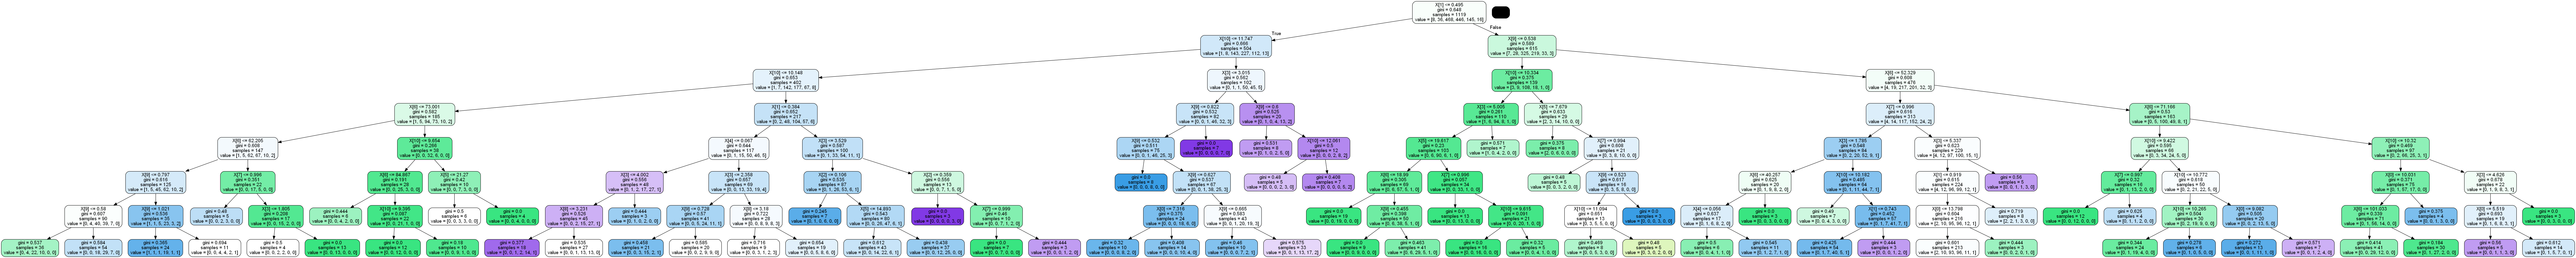

In [26]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
#Create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded=True,filled=True)
#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
#graph.write_png("tree.png")
#Show graph
Image(graph.create_png())

In [27]:
# Let's save the model
import pickle

with open('modelForPrediction.sav','wb') as f:
    pickle.dump(clf,f)

# Deployment

In [ ]:
1 . In Heroku
2 . Via Postman